# Exercise 1: Decay Chain

Study the evolution of the numbers, expressed with respect to their initial values, for the nuclei $X$, $Y$ and $Z$ with decay constants $\lambda$ and $\mu$ for $X$ and $Y$ respectively, and where $Z$ is assumed to be stable. Apply the previous results to the Xe-135 chain:
\begin{equation}
    ^{135}I \rightarrow ^{135}Xe \rightarrow ^{135}Cs
\end{equation}
Radioactive half-lives:
* Iodine: 6.53 h
* Xenon: 9.17 h
* Caesium: 2.6 $\times$ 10$^6$ h (effectively infinite)

## Direct Solution

In [ ]:
## Package import

import numpy as np
import matplotlib.pyplot as plt

## Variable definition

TauI = 6.57 # hours
TauXe = 9.14 # hours

## Initial conditions
I0 = 1
Xe0 = 0
Cs0 = 0

## Decay constants / SI conversion

LambdaI = np.log(2)/(TauI * 60 * 60)
LambdaXe = np.log(2)/(TauXe * 60 * 60)

## Define the time intervals

t0 = 0
tf = 3 * 24 * 3600 # 1 day
k = 5000

t_s = np.linspace(t0,tf,k)

## Analytical functions (Lambda approach)

IConc = lambda t,I0: I0*np.exp(-LambdaI*t)
XeConc = lambda t,I0,Xe0: (
    Xe0*np.exp(-(LambdaXe)*t)) + (
        (LambdaI*I0)/(LambdaI - LambdaXe) * (
        -np.exp(-LambdaI*t)+np.exp(-(LambdaXe)*t)))
CsConc = lambda t,Xe0,Cs0: Cs0+(
    Xe0*(1-np.exp(-LambdaXe*t)))+(
        I0*(1-(LambdaXe)/(LambdaXe-LambdaI)*np.exp(-LambdaI*t)+(LambdaI)/(
            LambdaXe-LambdaI)*np.exp(-LambdaXe*t)))

# Short-time evolution (3 days)

I_s = IConc(t_s,I0)
Xe_s = XeConc(t_s,I0,Xe0)
Cs_s = CsConc(t_s,Xe0,Cs0)

plt.plot(t_s/(24*3600),I_s, color = 'darkblue', label='Iodine')
plt.plot(t_s/(24*3600),Xe_s, color = 'darkred', label='Xenon')
plt.plot(t_s/(24*3600),Cs_s, color = 'forestgreen', label='Caesium')
plt.xlabel('Time (days)')
plt.ylabel('Normalised concentration (-)')
plt.legend(loc = 'best')
plt.grid()


In [ ]:
# Compute the rate of change (derivatives)

dI = -LambdaI*I_s
dXe = LambdaI*I_s - LambdaXe*Xe_s
dCs = LambdaXe*Xe_s

plt.plot(t_s/(24*3600),dI,'b',label=r'$\frac{dI}{dt}$')
plt.plot(t_s/(24*3600),dXe,'r',label=r'$\frac{dXe}{dt}$')
plt.plot(t_s/(24*3600),dCs,'g',label=r'$\frac{dCs}{dt}$')

plt.grid('g--',linewidth = 0.5)
plt.ylabel('Rate of Change')
plt.xlabel('Time (days)')
plt.title('I-Xe-Cs Decay Chain')
plt.legend();

In [3]:
# Find the half-life point

tf_long = 365*24*3600
k_long = 10000

t_long = np.linspace(t0,tf_long,k_long)

I_Long = IConc(t_long,I0)
Xe_Long = XeConc(t_long,I0,Xe0)
Cs_Long = CsConc(t_long,Xe0,Cs0)

I_halflife = I_Long[np.where(t_long/(24*3600) >= TauI)][0]
Xe_halflife = Xe_Long[np.where(t_long/(24*3600) >= TauXe)][0]
Cs_halflife = Cs_Long[np.where(t_long/(24*3600) >= TauXe)][0]

print(f'I concentration after half-life ({(round(TauI,2))} days): {I_halflife}')
print(f'Xe concentration after half-life ({(round(TauXe,2))} days): {Xe_halflife}')
print(f'Cs concentration after Xe half-life ({(round(TauXe,2))} days): {Cs_halflife}')



I concentration after half-life (6.57 days): 5.9505561805305695e-08
Xe concentration after half-life (9.14 days): 2.0320569886978895e-07
Cs concentration after Xe half-life (9.14 days): 0.9999997967102541


In [4]:
# Asymptotic behaviour

Cs_Inf = 0
t_new = 0
t_increment = 60

while Cs_Inf < I0:
  t_new += t_increment
  Cs_Inf = CsConc(t_new,Xe0,Cs0)

print(f"The asymptotic concentration for Cs ({(Cs_Inf)}) is reached after {(round(t_new/(3600*24)))} days")

The asymptotic concentration for Cs (1.0) is reached after 21 days


## Symbolic w/ Laplace

Study the evolution of the numbers, expressed with respect to their initial values, for the nuclei $X$, $Y$ and $Z$ with decay constants $\lambda$ and $\mu$ for $X$ and $Y$ respectively, and where $Z$ is assumed to be stable. Apply the previous results to the Xe-135 chain:
\begin{equation}
    ^{135}I \rightarrow ^{135}Xe \rightarrow ^{135}Cs
\end{equation}
Radioactive half-lives:
* Iodine: 6.53 h
* Xenon: 9.17 h
* Caesium: 2.6 $\times$ 10$^6$ h (effectively infinite)

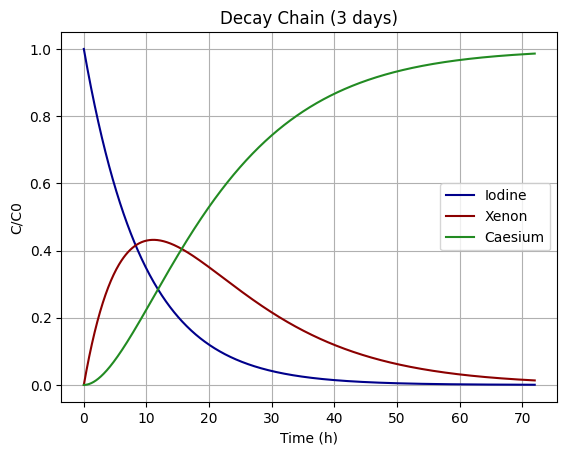

In [5]:
import sympy as sym
import numpy as num
from sympy import laplace_transform as Laplace
from sympy import inverse_laplace_transform as InvLaplace
import matplotlib.pyplot as plt

symLambda = sym.symbols('lambda')
symMu = sym.symbols('mu')
symt = sym.symbols('t', positive = True)
syms = sym.symbols('s')

symX = sym.Function('X')(symt)
symY = sym.Function('Y')(symt)
symZ = sym.Function('Z')(symt)

Bateman = [
    sym.Eq(sym.diff(symX),-symLambda*symX),
    sym.Eq(sym.diff(symY),symLambda*symX - symMu*symY),
    sym.Eq(sym.diff(symZ),symMu*symY),
]

# LAPLACE TRANSFORM

BatemanLaplace = [
    sym.Eq(
        Laplace(Bateman[0].lhs,symt,syms, noconds = True),
        Laplace(Bateman[0].rhs,symt,syms, noconds = True)
    ),
    sym.Eq(
        Laplace(Bateman[1].lhs,symt,syms, noconds = True),
        Laplace(Bateman[1].rhs,symt,syms, noconds = True)
    ),
    sym.Eq(
        Laplace(Bateman[2].lhs,symt,syms, noconds = True),
        Laplace(Bateman[2].rhs,symt,syms, noconds = True)
    )
]

LaplaceX = sym.solve(BatemanLaplace[0],sym.LaplaceTransform(symX,symt,syms))[0]

LaplaceY = sym.solve(
    BatemanLaplace[1].subs(sym.LaplaceTransform(symX,symt,syms),LaplaceX),sym.LaplaceTransform(symY,symt,syms))[0]

LaplaceZ = sym.solve(
    BatemanLaplace[2].subs(sym.LaplaceTransform(symY,symt,syms),LaplaceY),sym.LaplaceTransform(symZ,symt,syms))[0]

# DIRECT ANTITRANSFORMATION

X = InvLaplace(LaplaceX,syms,symt)
Y = InvLaplace(LaplaceY,syms,symt)
Z = InvLaplace(LaplaceZ,syms,symt)

numLambda = num.log(2)/6.53
numMu = num.log(2)/9.17

X = X.subs({
    symLambda:numLambda,
    symX.subs(symt,0):1
})
Y = Y.subs({
    symLambda:numLambda,
    symMu:numMu,
    symX.subs(symt,0):1,
    symY.subs(symt,0):0,
})
Z = Z.subs({
    symMu:numMu,
    symX.subs(symt,0):1,
    symY.subs(symt,0):0,
    symZ.subs(symt,0):0,
    symLambda:numLambda,
})

# NUMERICAL SOLUTION

numX = sym.lambdify(symt,X)
numY = sym.lambdify(symt,Y)
numZ = sym.lambdify(symt,Z)

t = num.linspace(0,72,1000)

plt.plot(t,numX(t), color = 'darkblue', label = 'Iodine')
plt.plot(t,numY(t), color = 'darkred', label = 'Xenon')
plt.plot(t,numZ(t), color = 'forestgreen', label = 'Caesium')
plt.title('Decay Chain (3 days)')
plt.grid(which = 'major')
plt.xlabel('Time (h)')
plt.ylabel('C/C0')
plt.legend(loc = 'best');

## Direct Solution (In-Core)

\begin{equation}
    I(t) = I_0\cdot e^{-\lambda_It} + \frac{y_I\cdot R_{I}}{\lambda_I}(1-e^{-\lambda_It})
\end{equation}

\begin{equation}
    Xe(t) = Xe_0\cdot e^{-(\lambda_{Xe}+R_{Xe})t} + \frac{I_0\cdot \lambda_I-y_I\cdot R_F}{\lambda_I-\lambda_{Xe}-R_{Xe}}(-e^{\lambda_It}+e^{-(\lambda_{Xe}+R_{Xe})}) + \frac{(y_I+y_{Xe})R_F}{\lambda_{Xe}+R_{Xe}}(1-e^{-(\lambda_{Xe}+R_{Xe})t})
\end{equation}

\begin{equation}
    Cs(t) = Cs_0 + Xe_0\cdot(1-e^{-\lambda_{Xe}t})+I_0\left(\frac{
    1-\lambda_{Xe}}{\lambda_{Xe}-\lambda_I}e^{-\lambda_It}+\frac{\lambda_I}{\lambda_{Xe}-\lambda_I}e^{-\lambda_{Xe}t}\right)
\end{equation}

In [ ]:
## Package import

import numpy as np
import matplotlib.pyplot as plt

## Variable definition

RateF = 9.34 * 10 ** (19) # fission/seconds
RateXe = 8.1 * 10 ** (-5) # captures/seconds
YieldI = 0.0639
TauI = 6.57 # hours
YieldXe = 0.00237
TauXe = 9.14 # hours

## Initial conditions
I0 = 1
Xe0 = 0
Cs0 = 0

## Decay constants / SI conversion

TauConv = lambda Tau: np.log(2)/Tau

LambdaI = TauConv(TauI * 3600)
LambdaXe = TauConv(TauXe * 3600)

## Define the time intervals

t0 = 0
tf = 3 * 24 * 3600 # 3 days
k = 5000

t_s = np.linspace(t0,tf,k)

## Analytical functions (Lambda approach)

IConc = lambda t,I0: I0*np.exp(-LambdaI*t) + (YieldI*RateF)/(LambdaI) * (
    1 - np.exp(-LambdaI*t))
XeConc = lambda t,I0,Xe0: Xe0*np.exp(-(LambdaXe+RateXe)*t) + (
    LambdaI*I0 - YieldI*RateF)/(LambdaI - LambdaXe - RateXe) * (
        -np.exp(-LambdaI*t)+np.exp(-(LambdaXe+RateXe)*t)) + ((
            YieldI+YieldXe)*RateF)/(LambdaXe+RateXe) * (1 - np.exp(-(
                LambdaXe+RateXe)*t))
CsConc = lambda t,Xe0,Cs0: Cs0+Xe0*(1-np.exp(-LambdaXe*t))+I0*(
    1-(LambdaXe)/(LambdaXe-LambdaI)*np.exp(-LambdaI*t)+(LambdaI)/(
        LambdaXe-LambdaI)*np.exp(-LambdaXe*t))

# Short-time evolution (3 days)

I_s = IConc(t_s,I0)
Xe_s = XeConc(t_s,I0,Xe0)
Cs_s = XeConc(t_s,Xe0,Cs0)

plt.plot(t_s/(24*3600),I_s, color = 'darkblue', label='Iodine')
plt.plot(t_s/(24*3600),Xe_s, color = 'darkred', label='Xenon')
plt.xlabel('Time (days)')
plt.ylabel('Normalised concentration (-)')
plt.legend(loc = 'best')
plt.grid()

# Steady-state

I_S = (YieldI*RateF)/(LambdaI)
Xe_S = (YieldI+YieldXe)*RateF/(LambdaXe+RateXe)

print("Steady-state I concentration: " + str(I_S))
print("Steady-state Xe concentration: " + str(Xe_S))



In [ ]:
# Assumption: shut-down after 3 days for 3 days

RateXe = 0
RateF = 0

I0 = I_S
Xe0 = Xe_S

tf_l = 3 * 24 * 3600 # 1 days
k_l = 5000

t_l = np.linspace(t0,tf_l,k_l)

I_l = IConc(t_l,I_s[-1])
Xe_l = XeConc(t_l,I_s[-1],Xe_s[-1])

plt.plot(t_l/(3600),I_l/I0, color = 'darkblue', label='Iodine')
plt.plot(t_l/(3600),Xe_l/Xe0, color = 'darkred', label='Xenon')
plt.xlabel('Time (hours)')
plt.ylabel('Normalised concentration (-)')
plt.legend(loc = 'best')
plt.grid()


In [ ]:
## Reactor restart after 3 days

RateF = 2 * 9.34 * 10 ** (19)  # fission/seconds
RateXe = 8.1 * 10 ** (-5)  # captures/seconds

tf_r = 3 * 24 * 3600 # 3 days
k_r = 5000

t_r = np.linspace(t0,tf_r,k_r)

I_r = IConc(t_r,I_l[-1])
Xe_r = XeConc(t_r,I_l[-1],Xe_l[-1])

plt.plot(t_r/(24*3600),I_r/I_S,color = 'darkblue', label='Iodine')
plt.plot(t_r/(24*3600),Xe_r/Xe_S, color = 'darkred', label='Xenon')
plt.xlabel('Time (hours)')
plt.ylabel('Normalised concentration (-)')
plt.legend(loc = 'best')
plt.grid()

In [ ]:
## Plot combine (30 days on - 1 day shut - 7 days half power)

t0 = 0
t1 = t_s[-1]
t2 = t1 + t_l[-1]
t3 = t2 + t_r[-1]

I = np.concatenate((I_s, I_l, I_r), axis=None)
Xe = np.concatenate((Xe_s, Xe_l, Xe_r), axis=None)
t = np.concatenate((t_s,(t1+t_l),(t2+t_r)),axis=None)

plt.plot(t/(24*3600),I, color = 'darkblue', label='Iodine')
plt.plot(t/(24*3600),Xe, color = 'darkred', label='Xenon')
plt.axvline(x=t_s[-1]/(24*3600),color='black',linestyle='--')
plt.axvline(x=(t_s[-1]+t_l[-1])/(24*3600),color='black',linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Normalised concentration')
plt.grid()
plt.legend()
plt.axvspan(t0,t1/(24*3600),color = 'forestgreen',alpha = 0.15)
plt.axvspan(t1/(24*3600), t2/(24*3600),color = 'orange',alpha = 0.15)
plt.axvspan(t2/(24*3600),t3/(24*3600),color = 'forestgreen',alpha = 0.15)

## Lead-Bismuth Decay Chain

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the problem data

TauBismuth = 5.012
TauPolonium = 138.376

InitialBismuth = 2 * 10 ** -10
InitialPolonium = 0
InitialLead = 0

LambdaBismuth = np.log(2)/(TauBismuth*24*3600)
LambdaPolonium = np.log(2)/(TauPolonium*24*3600)

print(f'Bismuth decay constant = {LambdaBismuth}')
print(f'Polonium decay constant = {LambdaPolonium}')

# Define the time discretisation vector

EndTime = 30 * 24 * 3600
Time = np.linspace(0,EndTime,1000)

# Write down the analytical solutions

BiConcentration = lambda t: InitialBismuth * np.exp(-LambdaBismuth*t)
PoConcentration = lambda t: LambdaBismuth*InitialBismuth * ((
    np.exp(-LambdaBismuth*t))/(LambdaPolonium-LambdaBismuth) + np.exp(
        -LambdaPolonium*t)/(LambdaBismuth-LambdaPolonium))
PbConcentration = lambda t: InitialBismuth*(1-(LambdaPolonium*np.exp(
    -LambdaBismuth*t))/(LambdaPolonium-LambdaBismuth)-(
        LambdaBismuth*np.exp(-LambdaPolonium*t)/(LambdaBismuth-LambdaPolonium)))

# Compute and plot the solution

Bi = BiConcentration(Time)
Po = PoConcentration(Time)
Pb = PbConcentration(Time)

plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.plot(Time,Bi, color = 'darkred',label = 'Bismuth')
plt.plot(Time,Po, color = 'forestgreen',label = 'Polonium')
plt.plot(Time,Pb, color = 'darkblue',label = 'Lead')
plt.ylabel('Concentration')
plt.xlabel('Time (sec)')
plt.title(f'Bismuth-Lead decay chain ({EndTime/(24*3600)} days)')
plt.grid()
plt.legend(loc = 'best')

# Compute the derivatives (rate of change)

dBi = -LambdaBismuth*Bi
dPo = -LambdaPolonium*Po + LambdaBismuth*Bi
dPb = LambdaPolonium*Po

plt.subplot(1,3,2)
plt.plot(Time,dBi, color = 'darkred',label = 'Bismuth')
plt.plot(Time,dPo, color = 'forestgreen',label = 'Polonium')
plt.plot(Time,dPb, color = 'darkblue',label = 'Lead')
plt.ylabel('Concentration')
plt.xlabel('Time (sec)')
plt.title(f'Rate of change')
plt.grid()
plt.legend(loc = 'best')

# Long-term solution (1 year)

EndTime = 365 * 24 * 3600
Time = np.linspace(0,EndTime,1000)

Bi = BiConcentration(Time)
Po = PoConcentration(Time)
Pb = PbConcentration(Time)

plt.subplot(1,3,3)
plt.plot(Time,Bi, color = 'darkred',label = 'Bismuth')
plt.plot(Time,Po, color = 'forestgreen',label = 'Polonium')
plt.plot(Time,Pb, color = 'darkblue',label = 'Lead')
plt.ylabel('Concentration')
plt.xlabel('Time (sec)')
plt.title(f'Bismuth-Lead decay chain ({EndTime/(24*3600)} days)')
plt.grid()
plt.legend(loc = 'best')

# Find the half-life point

BiHalved = Bi[np.where(Time/(24*3600) >= TauBismuth)][0]
PoHalved = Po[np.where(Time/(24*3600) >= TauPolonium)][0]

plt.subplot(1,3,3)
plt.scatter(TauBismuth*(24*3600),BiHalved, color = 'darkred', s = 50, label = 'Half-life concentration (Bismuth)')
plt.scatter(TauPolonium*(24*3600),PoHalved, color = 'forestgreen', s = 50, label = 'Half-life concentration (Polonium)')
plt.legend(loc = 'best')

plt.tight_layout()

# Asymptotic behaviour

PbStable = Pb[-1]
StabilityTime = Time[-1]
Increase = 365 * 24 * 3600
while PbStable < InitialBismuth:
    StabilityTime += Increase
    PbStable = PbConcentration(StabilityTime)

print(f'The asymptotic concentration of lead is reached after {StabilityTime/(365*24*3600)} years')

# Fissile And Fissionable Nuclei

The nuclide Th-232 is fissionable
The nuclide U-233 is fissile
The nuclide 235-U is fissile
The nuclide 238-U is fissionable
The nuclide 239-Pu is fissile


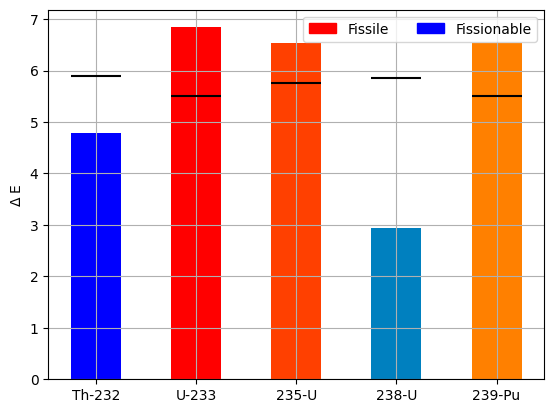

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

Nuclides = ['Th-232','Th-233','U-233','234-U','235-U','236-U','238-U','239-U','239-Pu','240-Pu']
Z = np.array([90,90,92,92,92,92,92,92,94,94])
AtomicMass = np.array([
    232.03805, 233.04158, 233.03963, 234.04095, 235.04393, 236.04557, 238.05079, 239.05629, 239.05216, 240.05381])
NucleonEnergy = 931.5 #MeV

A = np.round(AtomicMass)
N = A - Z

ProtonMass = 1.007276
NeutronMass = 1.008665

BindingEnergy = (Z*ProtonMass + N*NeutronMass) - A #AMU
BENucleon = BindingEnergy*NucleonEnergy/A

# REACTIONS

Reactions = [
    '232-Th + n',
    '233-Th',
    '233-U + n',
    '234-U',
    '235-U + n',
    '236-U',
    '238-U + n',
    '239-U',
    '239-Pu + n',
    '240-Pu'
]

CriticalEnergies = [5.9,6.5,5.5,4.6,5.75,5.3,5.85,5.5,5.5,4]

AddingN = AtomicMass
AddingN[0::2] = AtomicMass[0::2]+NeutronMass

DeltaEnergy = []

KBlue = cm.winter(np.linspace(0,1,3))
KRed = cm.autumn(np.linspace(0,1,5))

for ii in range(0,len(AddingN),2):
    DeltaEnergy.append((AddingN[ii]-AddingN[ii+1])*NucleonEnergy)

kk = 0
jj = 0
shift = 1
W = 0.5

for ii in range(len(DeltaEnergy)):
    if DeltaEnergy[ii] > CriticalEnergies[2*ii]:
        print(f'The nuclide {Nuclides[ii*2]} is fissile')
        B = plt.bar(Nuclides[ii*2],DeltaEnergy[ii], color = KRed[kk],width=W)
        plt.hlines(CriticalEnergies[2*ii],(shift*ii)+(-W/2),(shift*ii)+(W/2),color = 'black')
        kk += 1
    else:
        print(f'The nuclide {Nuclides[ii*2]} is fissionable')
        B = plt.bar(Nuclides[ii*2],DeltaEnergy[ii], color = KBlue[jj],width=W)
        plt.hlines(CriticalEnergies[2*ii],(shift*ii)+(-W/2),(shift*ii)+(W/2),color = 'black')
        jj += 1

RedPatch = mpatches.Patch(color='red', label='Fissile')
BluePatch = mpatches.Patch(color='blue', label='Fissionable')

plt.grid()
plt.ylabel(r'$\Delta$ E')
plt.legend(ncols = 2, handles = [RedPatch,BluePatch]);